<a href="https://colab.research.google.com/github/abs711/ml-from-scratch/blob/main/LinearRegression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [13]:
def mse_loss(y_pred,y):
  return np.mean((y_pred-y)**2)
class LinearRegression:
  def __init__(self, lr = 0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.loss = []

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features) # initializing weight with zeros
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      self.loss.append(mse_loss(y_pred,y))

      dw = (1/n_samples)*np.dot(X.T, (y_pred-y))
      db = (1/n_samples)*np.sum(y_pred-y)

      self.weights = self.weights - self.lr*dw
      self.bias = self.bias - self.lr*db



  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

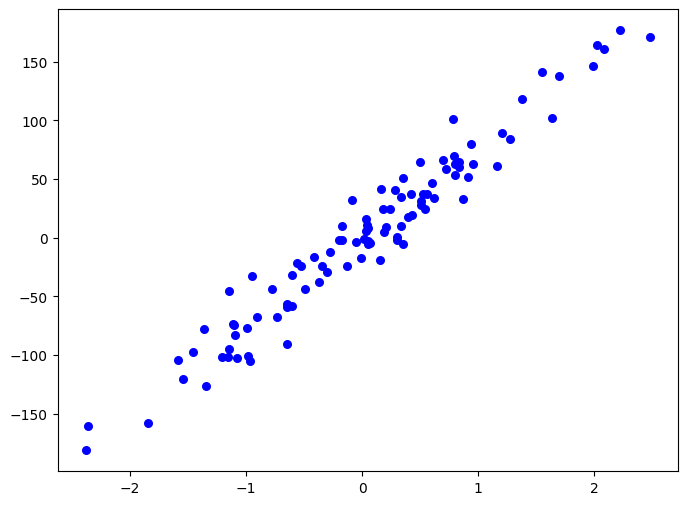

In [14]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color="b", marker="o", s=30)
plt.show()


In [23]:
reg = LinearRegression(n_iters=10000)

reg.fit(X_train, y_train)

predictions = reg.predict(X_test)

mse_loss(y_test, predictions)

305.7718792732816

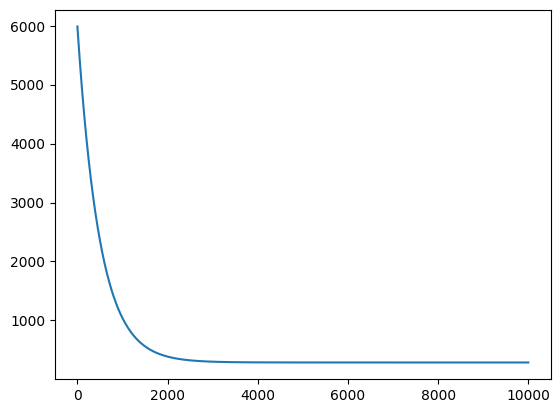

In [24]:
plt.plot(reg.loss)

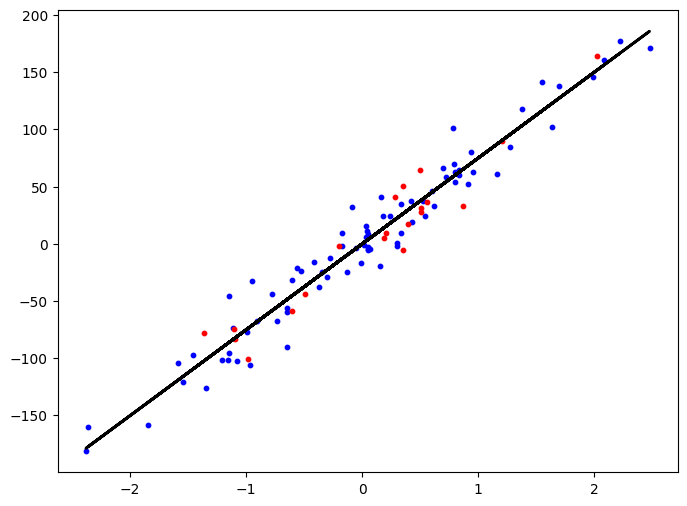

In [26]:
reg_line = reg.predict(X)

fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color="b", s=10)
m2 = plt.scatter(X_test, y_test, color="r", s=10)

plt.plot(X, reg_line, color='black', linewidth=2, label='Prediction')
plt.show()